In [47]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.linear_model import LinearRegression
import plotly.express as px
from tabulate import tabulate

# Carga y limpieza de datos

In [48]:
# leer csv
df = pd.read_csv('tmp/sentimentdataset.csv')
df

,Unnamed: 0.1,Unnamed: 0,Text,Sentiment,Timestamp,User,Platform,Hashtags,Retweets,Likes,Country,Year,Month,Day,Hour
0,0,0,Enjoying a beautiful day at the park! ...,Positive,2023-01-15 12:30:00,User123,Twitter,#Nature #Park,15.0,30.0,USA,2023,1,15,12
1,1,1,Traffic was terrible this morning. ...,Negative,2023-01-15 08:45:00,CommuterX,Twitter,#Traffic #Morning,5.0,10.0,Canada,2023,1,15,8
2,2,2,Just finished an amazing workout! 💪 ...,Positive,2023-01-15 15:45:00,FitnessFan,Instagram,#Fitness #Workout,20.0,40.0,USA,2023,1,15,15
3,3,3,Excited about the upcoming weekend getaway! ...,Positive,2023-01-15 18:20:00,AdventureX,Facebook,#Travel #Adventure,8.0,15.0,UK,2023,1,15,18
4,4,4,Trying out a new recipe for dinner tonight. ...,Neutral,2023-01-15 19:55:00,ChefCook,Instagram,#Cooking #Food,12.0,25.0,Australia,2023,1,15,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
727,728,732,Collaborating on a science project that receiv...,Happy,2017-08-18 18:20:00,ScienceProjectSuccessHighSchool,Facebook,#ScienceFairWinner #HighSchoolScience,20.0,39.0,UK,2017,8,18,18
728,729,733,Attending a surprise birthday party organized ...,Happy,2018-06-22 14:15:00,BirthdayPartyJoyHighSchool,Instagram,#SurpriseCelebration #HighSchoolFriendship,25.0,48.0,USA,2018,6,22,14
729,730,734,Successfully fundraising for a school charity ...,Happy,2019-04-05 17:30:00,CharityFundraisingTriumphHighSchool,Twitter,#CommunityGiving #HighSchoolPhilanthropy,22.0,42.0,Canada,2019,4,5,17
730,731,735,"Participating in a multicultural festival, cel...",Happy,2020-02-29 20:45:00,MulticulturalFestivalJoyHighSchool,Facebook,#CulturalCelebration #HighSchoolUnity,21.0,43.0,UK,2020,2,29,20


In [49]:
# eliminar columnas 
df.drop(columns=['Unnamed: 0.1', 'Unnamed: 0', 'Hour'], inplace=True)
df.head(10)

,Text,Sentiment,Timestamp,User,Platform,Hashtags,Retweets,Likes,Country,Year,Month,Day
0,Enjoying a beautiful day at the park! ...,Positive,2023-01-15 12:30:00,User123,Twitter,#Nature #Park,15.0,30.0,USA,2023,1,15
1,Traffic was terrible this morning. ...,Negative,2023-01-15 08:45:00,CommuterX,Twitter,#Traffic #Morning,5.0,10.0,Canada,2023,1,15
2,Just finished an amazing workout! 💪 ...,Positive,2023-01-15 15:45:00,FitnessFan,Instagram,#Fitness #Workout,20.0,40.0,USA,2023,1,15
3,Excited about the upcoming weekend getaway! ...,Positive,2023-01-15 18:20:00,AdventureX,Facebook,#Travel #Adventure,8.0,15.0,UK,2023,1,15
4,Trying out a new recipe for dinner tonight. ...,Neutral,2023-01-15 19:55:00,ChefCook,Instagram,#Cooking #Food,12.0,25.0,Australia,2023,1,15
5,Feeling grateful for the little things in lif...,Positive,2023-01-16 09:10:00,GratitudeNow,Twitter,#Gratitude #PositiveVibes,25.0,50.0,India,2023,1,16
6,Rainy days call for cozy blankets and hot coc...,Positive,2023-01-16 14:45:00,RainyDays,Facebook,#RainyDays #Cozy,10.0,20.0,Canada,2023,1,16
7,The new movie release is a must-watch! ...,Positive,2023-01-16 19:30:00,MovieBuff,Instagram,#MovieNight #MustWatch,15.0,30.0,USA,2023,1,16
8,Political discussions heating up on the timel...,Negative,2023-01-17 08:00:00,DebateTalk,Twitter,#Politics #Debate,30.0,60.0,USA,2023,1,17
9,Missing summer vibes and beach days. ...,Neutral,2023-01-17 12:20:00,BeachLover,Facebook,#Summer #BeachDays,18.0,35.0,Australia,2023,1,17


In [50]:
# eliminar filas con valores faltantes

df.dropna(axis=0, how='any', inplace=True)
df.head(10)

,Text,Sentiment,Timestamp,User,Platform,Hashtags,Retweets,Likes,Country,Year,Month,Day
0,Enjoying a beautiful day at the park! ...,Positive,2023-01-15 12:30:00,User123,Twitter,#Nature #Park,15.0,30.0,USA,2023,1,15
1,Traffic was terrible this morning. ...,Negative,2023-01-15 08:45:00,CommuterX,Twitter,#Traffic #Morning,5.0,10.0,Canada,2023,1,15
2,Just finished an amazing workout! 💪 ...,Positive,2023-01-15 15:45:00,FitnessFan,Instagram,#Fitness #Workout,20.0,40.0,USA,2023,1,15
3,Excited about the upcoming weekend getaway! ...,Positive,2023-01-15 18:20:00,AdventureX,Facebook,#Travel #Adventure,8.0,15.0,UK,2023,1,15
4,Trying out a new recipe for dinner tonight. ...,Neutral,2023-01-15 19:55:00,ChefCook,Instagram,#Cooking #Food,12.0,25.0,Australia,2023,1,15
5,Feeling grateful for the little things in lif...,Positive,2023-01-16 09:10:00,GratitudeNow,Twitter,#Gratitude #PositiveVibes,25.0,50.0,India,2023,1,16
6,Rainy days call for cozy blankets and hot coc...,Positive,2023-01-16 14:45:00,RainyDays,Facebook,#RainyDays #Cozy,10.0,20.0,Canada,2023,1,16
7,The new movie release is a must-watch! ...,Positive,2023-01-16 19:30:00,MovieBuff,Instagram,#MovieNight #MustWatch,15.0,30.0,USA,2023,1,16
8,Political discussions heating up on the timel...,Negative,2023-01-17 08:00:00,DebateTalk,Twitter,#Politics #Debate,30.0,60.0,USA,2023,1,17
9,Missing summer vibes and beach days. ...,Neutral,2023-01-17 12:20:00,BeachLover,Facebook,#Summer #BeachDays,18.0,35.0,Australia,2023,1,17


In [51]:
# renombrar las columnas 
renombrado = {
    'Text': 'comentario',
    'Sentiment' : 'sentimiento',
    'Timestamp': 'fecha y hora',
    'User' : 'usuario',
    'Platform' : 'plataforma',
    'Hashtags' : 'hashtags',
    'Retweets' : 'retweets',
    'Likes' : 'likes',
    'Country' : 'pais',
    'Year' : 'año',
    'Month' : 'mes',
    'Day' : 'dia'
}

df.rename(columns=renombrado, inplace=True)
df.head(10)

,comentario,sentimiento,fecha y hora,usuario,plataforma,hashtags,retweets,likes,pais,año,mes,dia
0,Enjoying a beautiful day at the park! ...,Positive,2023-01-15 12:30:00,User123,Twitter,#Nature #Park,15.0,30.0,USA,2023,1,15
1,Traffic was terrible this morning. ...,Negative,2023-01-15 08:45:00,CommuterX,Twitter,#Traffic #Morning,5.0,10.0,Canada,2023,1,15
2,Just finished an amazing workout! 💪 ...,Positive,2023-01-15 15:45:00,FitnessFan,Instagram,#Fitness #Workout,20.0,40.0,USA,2023,1,15
3,Excited about the upcoming weekend getaway! ...,Positive,2023-01-15 18:20:00,AdventureX,Facebook,#Travel #Adventure,8.0,15.0,UK,2023,1,15
4,Trying out a new recipe for dinner tonight. ...,Neutral,2023-01-15 19:55:00,ChefCook,Instagram,#Cooking #Food,12.0,25.0,Australia,2023,1,15
5,Feeling grateful for the little things in lif...,Positive,2023-01-16 09:10:00,GratitudeNow,Twitter,#Gratitude #PositiveVibes,25.0,50.0,India,2023,1,16
6,Rainy days call for cozy blankets and hot coc...,Positive,2023-01-16 14:45:00,RainyDays,Facebook,#RainyDays #Cozy,10.0,20.0,Canada,2023,1,16
7,The new movie release is a must-watch! ...,Positive,2023-01-16 19:30:00,MovieBuff,Instagram,#MovieNight #MustWatch,15.0,30.0,USA,2023,1,16
8,Political discussions heating up on the timel...,Negative,2023-01-17 08:00:00,DebateTalk,Twitter,#Politics #Debate,30.0,60.0,USA,2023,1,17
9,Missing summer vibes and beach days. ...,Neutral,2023-01-17 12:20:00,BeachLover,Facebook,#Summer #BeachDays,18.0,35.0,Australia,2023,1,17


In [52]:
# Verificar si hay comentarios duplicados
duplicados = df[df.duplicated(subset='comentario', keep=False)]

# Mostrar los comentarios duplicados
print(duplicados)

                                            comentario      sentimiento  \
264   A compassionate rain, tears of empathy fallin...   Compassionate    
265   Proudly scaling the peaks of achievement, a m...           Proud    
266   Embraced by the hopeful dawn, a gardener sowi...         Hopeful    
267   A playful escapade in the carnival of life, c...         Playful    
268   Floating on clouds of inspiration, an artist ...        Inspired    
269   Navigating the river of contentment, a serene...     Contentment    
270   With empathy as a lantern, wandering through ...      Empathetic    
271   A free spirit soaring on the wings of dreams,...   Free-spirited    
272   Bathed in the golden hues of gratefulness, a ...        Grateful    
273   Confident strides in the dance of life, a bal...       Confident    
274   Hopeful whispers of wind, carrying the promis...         Hopeful    
275   Playfully juggling responsibilities, a circus...         Playful    
276   Whispering tales of

In [53]:
# Eliminar comentarios duplicados
df_sin_duplicados = df.drop_duplicates(subset='comentario')

# Verificar la cantidad de comentarios después de eliminar duplicados
print("Número de comentarios únicos:", len(df_sin_duplicados))


Número de comentarios únicos: 707


# Análisis de los datos

## 1. 

In [54]:
# Calcula media, mediana y desviacion estandar 
print("Media de likes: ", df['likes'].mean())
print("Mediana de likes: ", df['likes'].median())
print("Desviación estándar de retweets: ", df['retweets'].std())

Media de likes:  42.90163934426229
Mediana de likes:  43.0
Desviación estándar de retweets:  7.061286414470444


#### Los resultados muestran que, en promedio, los comentarios reciben 42.9 likes, y la mediana es de 43, lo que indica que los likes están bastante concentrados alrededor de ese valor, sin grandes desviaciones. Por otro lado, la desviación estándar de los retweets es 7.06, lo que sugiere una variabilidad moderada, con algunos comentarios recibiendo más o menos retweets que el promedio.

## 2. 

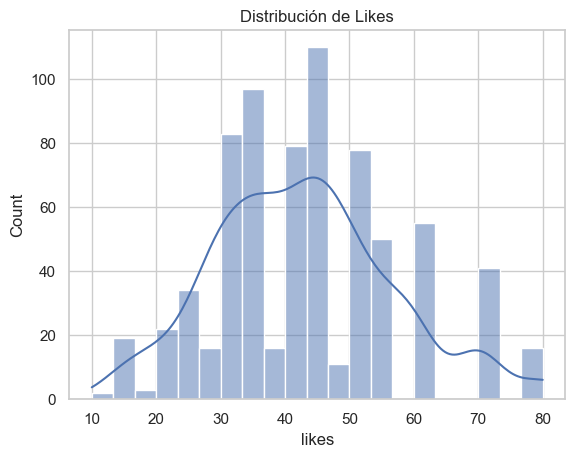

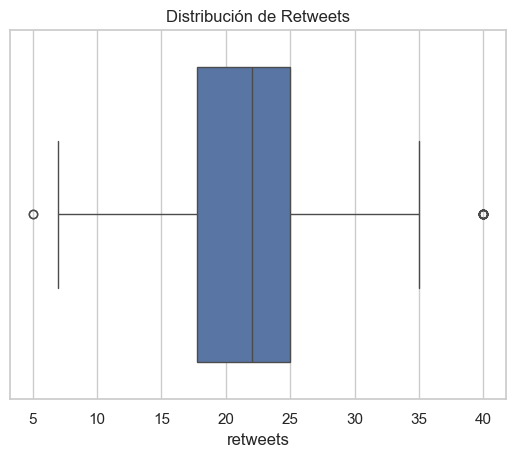

In [55]:
# Histograma de likes
sns.histplot(df['likes'], kde=True)
plt.title('Distribución de Likes')
plt.show()

# Boxplot de retweets
sns.boxplot(x=df['retweets'])
plt.title('Distribución de Retweets')
plt.show()

#### Histograma: los comentarios reciben 42.9 likes, y la mediana es de 43, lo que indica que los likes están bastante concentrados alrededor de ese valor
#### Boxplot: la mayoría de los retweets están concentrados entre 17 y 25, con una mediana de 22, mientras que tienes algunos valores extremos en 5 y 40

## 3. 

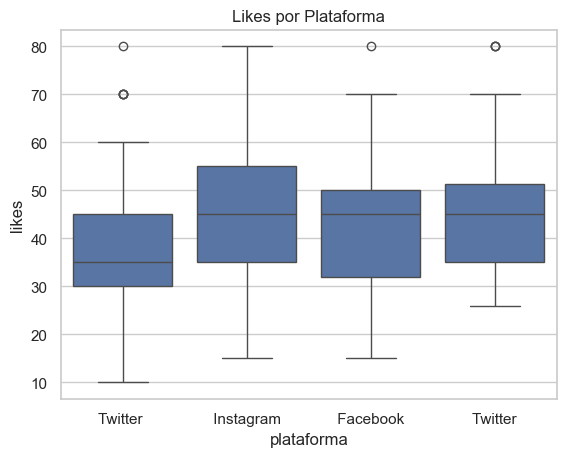

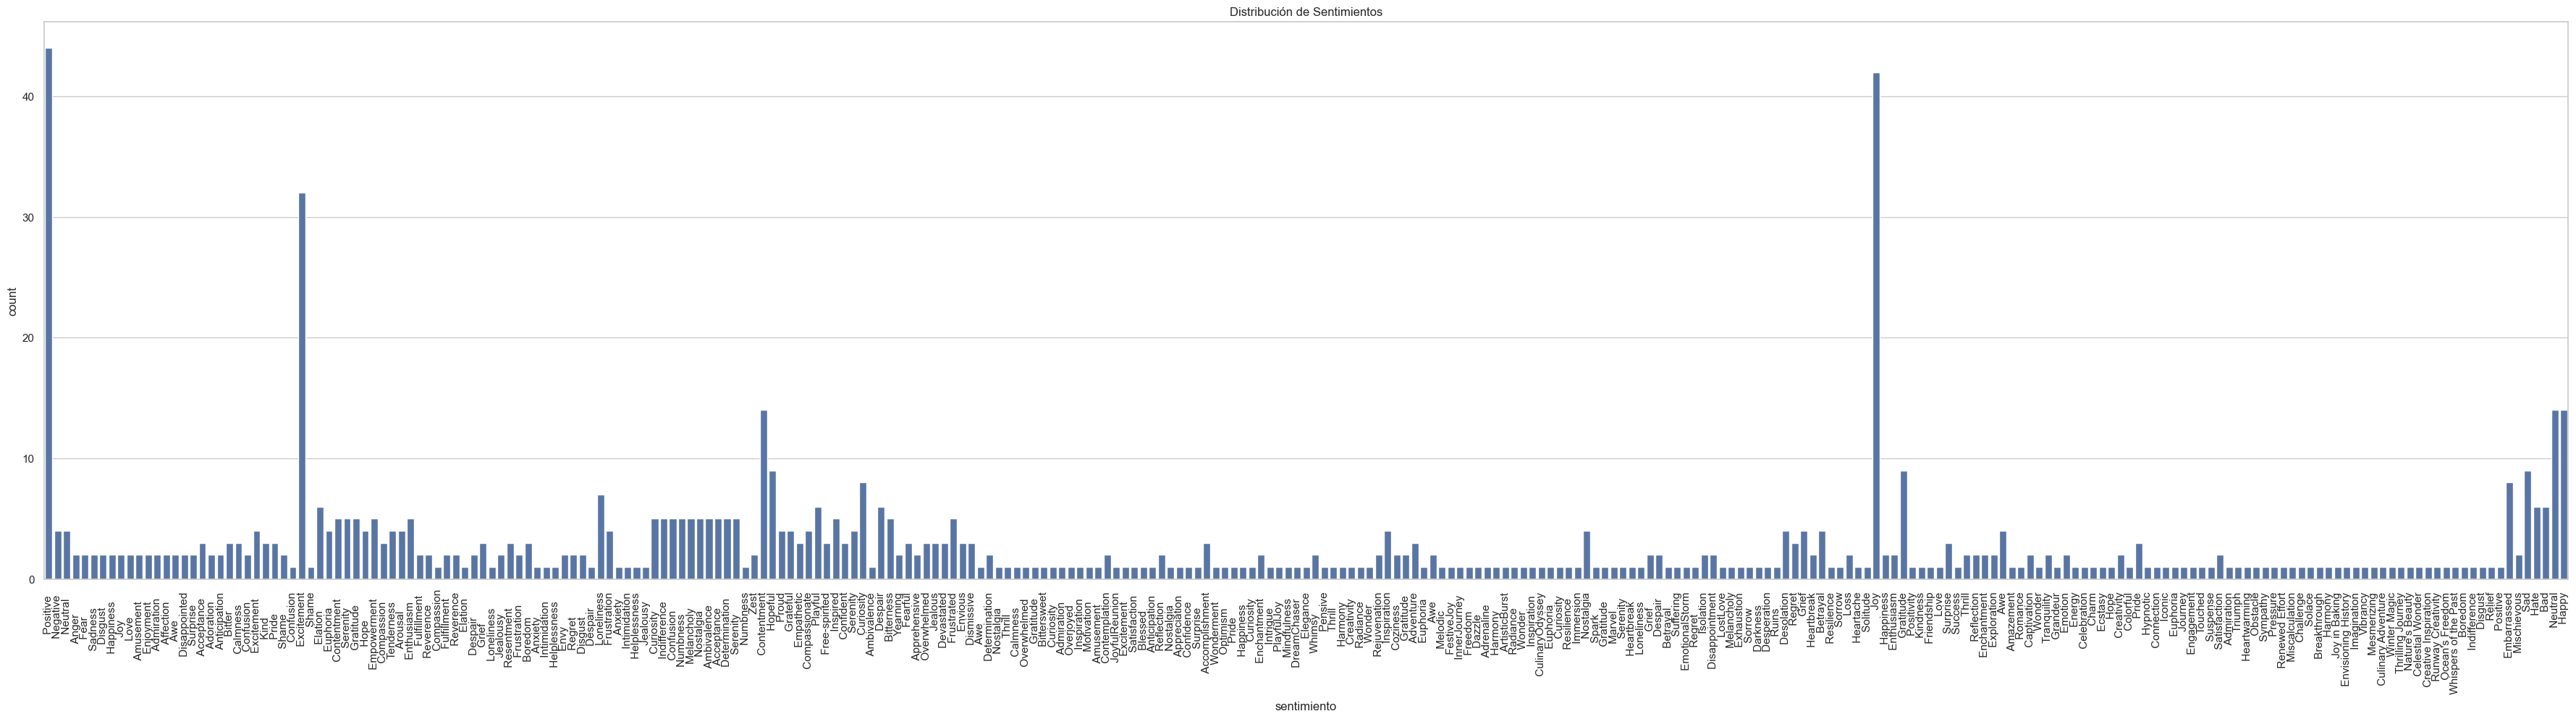

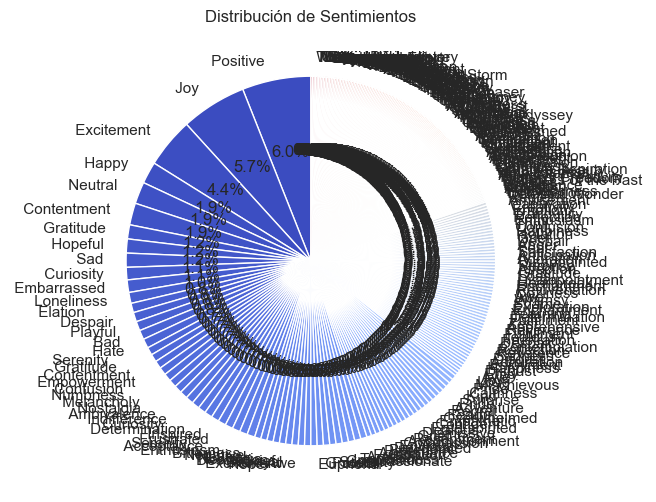

In [56]:
# Boxplot de likes por plataforma
sns.boxplot(x='plataforma', y='likes', data=df)
plt.title('Likes por Plataforma')
plt.show()

# Conteo de sentimientos
plt.figure(figsize=(45,10))
sns.countplot(x='sentimiento', data=df)
plt.title('Distribución de Sentimientos')
plt.xticks(rotation=90)
plt.show()

# Pie plot de sentimeintos
plt.figure(figsize=(10, 6))
df['sentimiento'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90, cmap='coolwarm')

plt.title('Distribución de Sentimientos')
plt.ylabel('') 
plt.show()


#### Boxplot:
#### - Twitter 1: La mayoría de los likes están entre 30 y 45, con una mediana en 35. Los valores típicos caen entre 10 y 60, pero hay dos valores atípicos altos en 70 y 80, lo que indica algunos posts que han obtenido muchos likes.
#### - Instagram: Tiene una distribución más amplia, con la caja entre 35 y 55, y una mediana en 45. Los likes están entre 15 y 80, mostrando una mayor variabilidad en comparación con Twitter 1.
#### - Facebook: Es bastante similar a Instagram, con la caja que abarca de 31 a 50 y una mediana en 45. Hay un outlier en 80, lo que muestra que, al igual que en Twitter 1, algunos posts obtienen más interacción.
#### - Twitter 2: Tiene un comportamiento parecido al de Facebook e Instagram, con una caja que va de 35 a 51 y una mediana en 45. Un outlier alto también aparece en 80, lo que sugiere publicaciones que se destacan en likes.

#### Gráfica de barras y pastel:
#### - Podemos ver que los sentimientos mas expresados con positivos 

## 4. 

In [57]:
# Correlación entre retweets y likes
print("Correlación entre Retweets y Likes: ", df[['retweets', 'likes']].corr())

# Regresión lineal simple
X = df[['retweets']]
y = df['likes']
reg = LinearRegression().fit(X, y)

# Predicción de likes basada en retweets
print("Coeficiente de regresión: ", reg.coef_)
print("Intercepto: ", reg.intercept_)

Correlación entre Retweets y Likes:            retweets     likes
retweets  1.000000  0.998482
likes     0.998482  1.000000
Coeficiente de regresión:  [1.99233691]
Intercepto:  0.05006508091711481


#### El análisis muestra una correlación muy alta (0.998) entre los retweets y los likes, lo que significa que estas dos variables están fuertemente relacionadas. A medida que aumentan los retweets, los likes también tienden a aumentar de manera casi proporcional. 
#### La regresión lineal simple indica que por cada retweet adicional, se esperan aproximadamente 1.99 likes adicionales. El intercepto de 0.05 sugiere que si hubiera 0 retweets, el valor predicho de likes sería prácticamente nulo

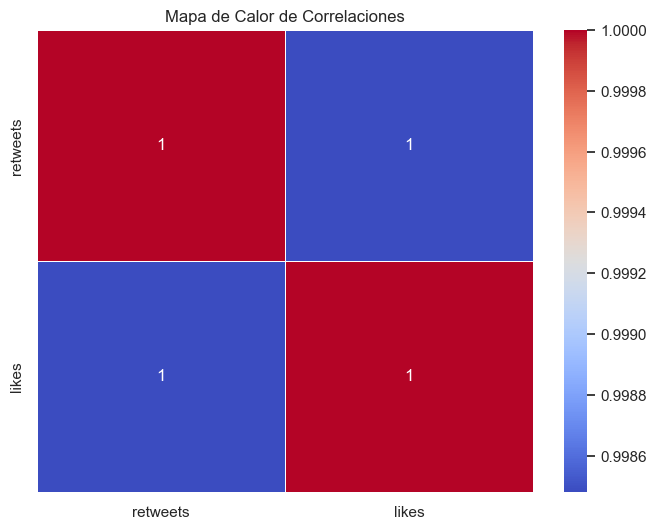

In [58]:
# Mapa de calor de correlaciones
plt.figure(figsize=(8, 6))
corr = df[['retweets', 'likes']].corr()

# Crear el heatmap
sns.heatmap(
    corr,
    annot=True,  # Mostrar los valores de correlación en el gráfico
    cmap='coolwarm',  # Colores coolwarm
    linewidths=0.5  # Separación entre las celdas
)

# Título del mapa
plt.title('Mapa de Calor de Correlaciones')
plt.show()


#### El mapa de calor de correlaciones visualiza la relación entre los retweets y likes, destacando su alta correlación positiva (0.998). El uso del esquema de colores resalta la intensidad de la correlación, que está muy cerca de 1, lo que indica una relación casi perfecta entre estas dos variables.

## 5.

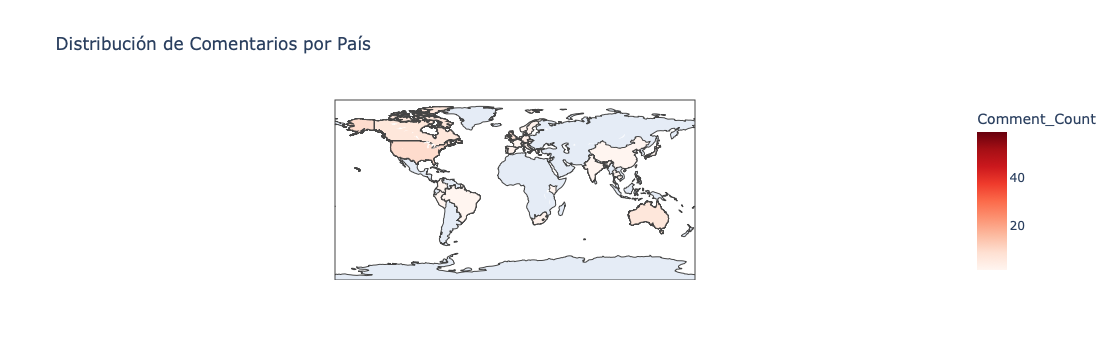

In [59]:
# Agrupar por país para obtener el número de comentarios 
comentarios_por_pais = df.groupby('pais')['sentimiento'].count().reset_index()
comentarios_por_pais.columns = ['Country', 'Comment_Count']

# Crear el mapa 
fig = px.choropleth(
    comentarios_por_pais,
    locations='Country',  # Columna de países
    locationmode='country names',  # Usa nombres de países
    color='Comment_Count',  # Columna con los valores (número de comentarios)
    hover_name='Country',  # Lo que aparecerá al pasar el cursor
    color_continuous_scale='Reds',  # Escala de colores
    title='Distribución de Comentarios por País'  # Título del gráfico
)

fig.show()

#### En este mapa se muestran cuantos comentarios hay por país 

## 6. 

In [60]:
#' Positive  '
#' Negative  '


        Hashtag  Frecuencia
0      #Traffic           1
1      #Morning           1
2     #Politics           1
3       #Debate           1
4      #SickDay           1
5       #Health           1
6  #WinterBlues           1
7         #Mood           1


/var/folders/jr/jmvb2ycd5j3_8s8s_s85rb8w0000gn/T/ipykernel_55753/612217042.py:19: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




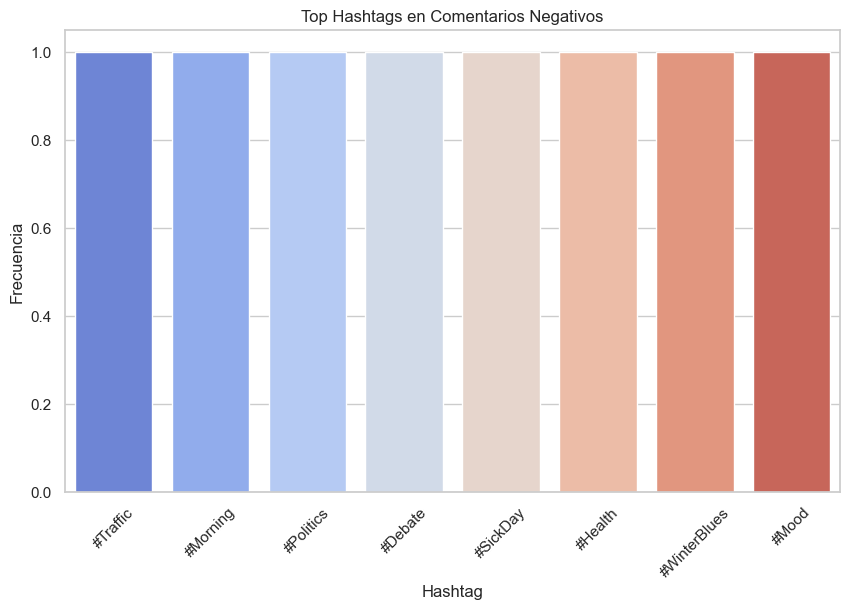

In [61]:
# Filtrar solo comentarios negativos
negativos = df[df['sentimiento'] == ' Negative  ']

# Dividir hashtags por espacios y luego expandir a filas
negativos_hashtags = negativos['hashtags'].str.split(expand=True).stack().reset_index(drop=True)

# Contar los 10 hashtags más comunes en comentarios negativos
hashtags_negativos = negativos_hashtags.value_counts().head(10)

# Crear DataFrame con los resultados
hashtags_df = pd.DataFrame({
    'Hashtag': hashtags_negativos.index,
    'Frecuencia': hashtags_negativos.values
})
print(hashtags_df)

# histograma
plt.figure(figsize=(10, 6))
sns.barplot(x='Hashtag', y='Frecuencia', data=hashtags_df, palette='coolwarm')
plt.title('Top Hashtags en Comentarios Negativos')
plt.xticks(rotation=45)
plt.show()

#### El histograma de hashtags en comentarios negativos muestra los 8 hashtags más frecuentes asociados con comentarios negativos.
#### Cada barra representa un hashtag, con su altura indicando la frecuencia de uso en comentarios negativos.

## 7. 

           Hashtag  Frecuencia
0          #Nature           2
1         #Fitness           2
2         #Cooking           2
3             #Art           2
4         #Reading           2
5  #VirtualReality           2
6          #Gaming           2
7      #Reflection           2
8       #RainyDays           1
9            #Cozy           1


/var/folders/jr/jmvb2ycd5j3_8s8s_s85rb8w0000gn/T/ipykernel_55753/1131635084.py:19: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




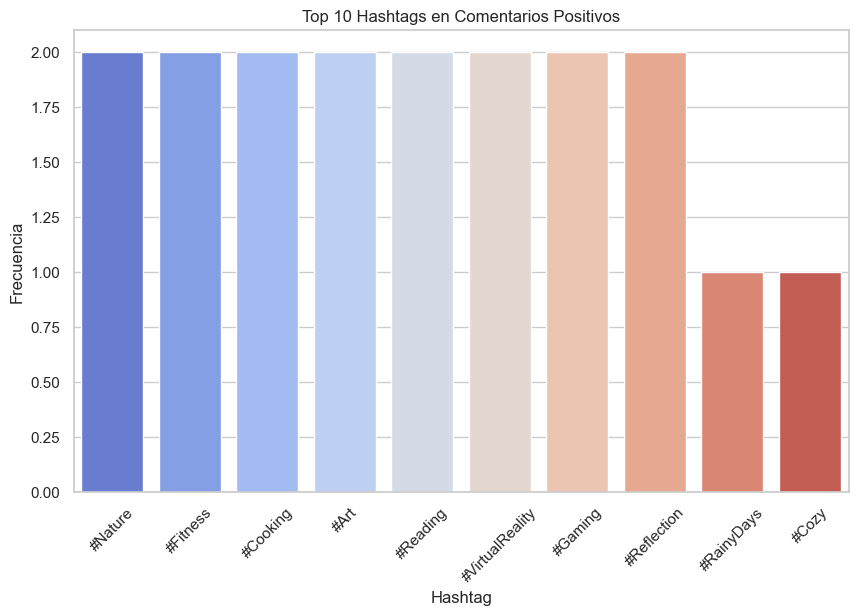

In [62]:
# Filtrar solo comentarios positivos
negativos = df[df['sentimiento'] == ' Positive  ']

# Dividir hashtags por espacios y luego expandir a filas
negativos_hashtags = negativos['hashtags'].str.split(expand=True).stack().reset_index(drop=True)

# Contar los 10 hashtags más comunes en comentarios positivos
hashtags_negativos = negativos_hashtags.value_counts().head(10)

# Crear DataFrame con los resultados
hashtags_df = pd.DataFrame({
    'Hashtag': hashtags_negativos.index,
    'Frecuencia': hashtags_negativos.values
})
print(hashtags_df)

#  histograma
plt.figure(figsize=(10, 6))
sns.barplot(x='Hashtag', y='Frecuencia', data=hashtags_df, palette='coolwarm')
plt.title('Top 10 Hashtags en Comentarios Positivos')
plt.xticks(rotation=45)
plt.show()

#### Este gráfico permite identificar los hashtags más frecuentemente asociados con comentarios positivos en el dataset.

## 8. 

In [63]:
# Contar la frecuencia de cada usuario
usuario_counts = df['usuario'].value_counts()

# Filtrar los 10 usuarios que aparecen más veces
top_10_usuarios = usuario_counts.head(10)

# Crear DataFrame con los usuarios repetidos y sus frecuencias
top_10_usuarios_df = top_10_usuarios.reset_index()
top_10_usuarios_df.columns = ['Usuario', 'Frecuencia']

# Mostrar la tabla con los top 10 usuarios repetidos y sus frecuencias
print(top_10_usuarios_df)


              Usuario  Frecuencia
0    WinterWarmth               3
1       RainNurturer            3
2      PeakConqueror            3
3       DawnGardener            3
4    CarnivalDreamer            3
5      WindWhisperer            3
6     SeaBreezeLover            2
7    CosmosExplorer             2
8   SpringEnthusiast            2
9    StudioArtist               2


#### Estos usuarios son los que han participado más frecuentemente, con los primeros seis liderando con tres comentarios cada uno, y los siguientes cuatro con dos

## 9. 

In [64]:
# Convertir la columna 'fecha y hora' a datetime
df['fecha y hora'] = pd.to_datetime(df['fecha y hora'])

# Crear una nueva columna 'parte_del_dia'
def classify_time(hour):
    if 5 <= hour < 12:
        return 'Mañana'
    elif 12 <= hour < 18:
        return 'Tarde'
    else:
        return 'Noche'

df['parte_del_dia'] = df['fecha y hora'].dt.hour.apply(classify_time)

# Filtrar para obtener solo los sentimientos positivos y negativos
df_filtered = df[df['sentimiento'].isin([' Positive  ', ' Negative  '])]

# Calcular la distribución de sentimientos positivos y negativos por parte del día
sentimientos_por_periodo = df_filtered.groupby('parte_del_dia')['sentimiento'].value_counts().unstack().fillna(0)

# Mostrar la tabla
print(sentimientos_por_periodo)

sentimiento    Negative    Positive  
parte_del_dia                        
Mañana                3.0         9.0
Noche                 0.0        11.0
Tarde                 1.0        24.0


#### La mayoría de los comentarios positivos llegan por la tarde, con 24 positivos frente a solo 1 negativo. En la mañana, hay una cantidad moderada de positivos (9) y un poco más de negativos (3). En la noche, no hay comentarios negativos y hay menos positivos (11) en comparación con la tarde. En resumen, los comentarios positivos son más frecuentes y predominan en la tarde, mientras que la noche tiene comentarios positivos sin negativos, y la mañana tiene una mezcla de ambos.

## 10. 

In [65]:
#print(df['sentimiento'].unique())


In [66]:
# Convertir la columna 'fecha y hora' a datetime
df['fecha y hora'] = pd.to_datetime(df['fecha y hora'])

# Crear una nueva columna 'hora' y 'parte_del_dia'
df['hora'] = df['fecha y hora'].dt.hour
df['parte_del_dia'] = df['hora'].apply(lambda x: 'Mañana' if 5 <= x < 12 else ('Tarde' if 12 <= x < 18 else 'Noche'))

# Filtrar para obtener solo los sentimientos positivos y negativos
df_filtered = df[df['sentimiento'].isin([' Positive  ', ' Negative  ',  ' Joy          ', ' Boredom         '])]

# Calcular la distribución de sentimientos positivos y negativos por parte del día y hora
sentimientos_por_periodo_y_hora = df_filtered.groupby(['parte_del_dia', 'hora'])['sentimiento'].value_counts().unstack().fillna(0)

# Mostrar la tabla
print(sentimientos_por_periodo_y_hora)

sentimiento         Boredom           Joy            Negative    Positive  
parte_del_dia hora                                                         
Mañana        8                  0.0            0.0         2.0         2.0
              9                  0.0            0.0         0.0         4.0
              10                 0.0            0.0         1.0         1.0
              11                 0.0            0.0         0.0         2.0
Noche         0                  0.0            0.0         0.0         1.0
              18                 0.0            0.0         0.0         4.0
              19                 3.0            2.0         0.0         4.0
              20                 0.0            0.0         0.0         2.0
Tarde         12                 0.0            0.0         0.0         3.0
              13                 0.0            0.0         0.0         4.0
              14                 0.0            0.0         0.0         5.0
            

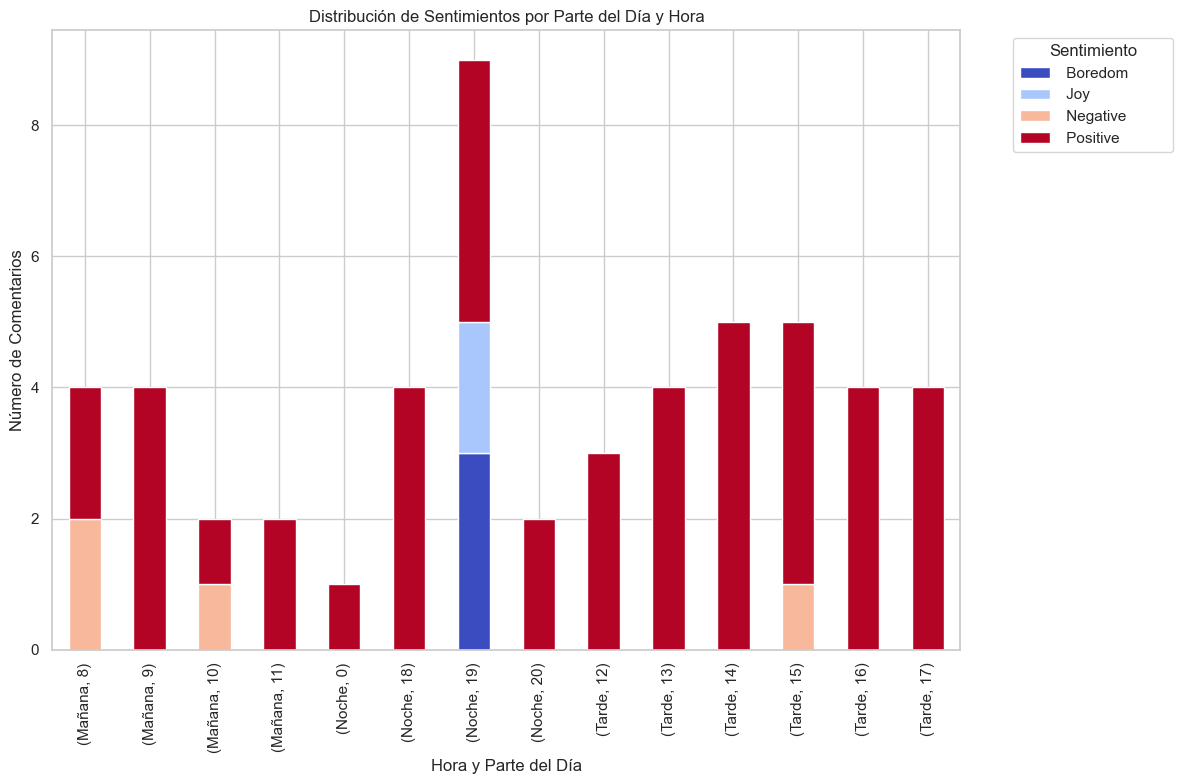

In [67]:
# Configurar el estilo de los gráficos
sns.set(style='whitegrid')

# Crear una tabla de datos para la visualización
sentimientos_por_periodo_y_hora = df_filtered.groupby(['parte_del_dia', 'hora'])['sentimiento'].value_counts().unstack().fillna(0)

# Crear un gráfico de barras apiladas
sentimientos_por_periodo_y_hora.plot(kind='bar', stacked=True, figsize=(12, 8), colormap='coolwarm')

# Añadir título y etiquetas
plt.title('Distribución de Sentimientos por Parte del Día y Hora')
plt.xlabel('Hora y Parte del Día')
plt.ylabel('Número de Comentarios')
plt.legend(title='Sentimiento', bbox_to_anchor=(1.05, 1), loc='upper left')

# Ajustar el layout para que no se corten las etiquetas
plt.tight_layout()

# Mostrar el gráfico
plt.show()


#### Este gráfico ayuda a visualizar la variación de los sentimientos a diferentes horas del día, resaltando que los comentarios positivos son consistentes a lo largo de todas las partes del día, mientras que los negativos y de aburrimiento son menos frecuentes.